# 1. Library

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

from IPython.display import display, HTML #Untuk menampilkan output semua baris
pd.set_option("display.max_rows", None, "display.max_columns", None)

#Untuk Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression #Logistic Regression Model
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# 2. Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_train = pd.read_csv('/content/gdrive/MyDrive/DA Zenius/application_train.csv')

# 3. Data Understanding

In [ ]:
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 3.1 Menyesuaikan Type Data

In [ ]:
#Melihat jumlah baris dan kolom
data_train.shape

(307511, 122)

In [ ]:
# Menghitung tipe data setiap kolom
data_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [ ]:
# Banyaknya unique class di setiap kolom kategorikal
data_train.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
# Melihat data info

def stats_info(df):
    print(df.info(verbose=True, null_counts=True ))
    print("-----"*15)
    print(f"Shape of the df {df} is {df.shape} \n")
    print("-----"*15)
    print(f"Statistical summary of {df} is :")
    print("-----"*15)
    print(f"Description of the df {df}:\n")
    print(display(HTML(np.round(df.describe(),2).to_html())))

In [ ]:
stats_info(data_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,3.075110e+05,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.0,307511.00,307511.0,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.0,307511.00,307511.0,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,1.687979e+05,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.0,0.82,0.2,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,2.371231e+05,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.0,0.38,0.4,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.0

None


Setelah dilakukan pengecekan type data :
1. Tidak ditemukan type data yang tidak sesuai dengan data yang disajikan.
2. Terdapat anomali pada kolom DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH dimana data tersebut bernilai negative yang pada kenyataan tidak mungkin bernilai negative. Akan ditunjukan lagi pada visualisasi; univariate analysis

## 3.2 Mengecheck Data Duplikat

In [ ]:
columns_without_id = [col for col in data_train.columns if col!='SK_ID_CURR']
#Checking for duplicates in the data.
data_train[data_train.duplicated(subset = columns_without_id, keep=False)]
print('The no of duplicates in the data:',data_train[data_train.duplicated(subset = columns_without_id, keep=False)]
      .shape[0])

The no of duplicates in the data: 0


Hasil yang diperoleh yaitu tidak ada duplikat data pada dataframe train. Proses dapat dilanjutkan ke step berikutnya

## 3.2 Missing Value Checking

In [ ]:
missing_value = data_train.isnull().sum().reset_index()
missing_value.columns = ['feature','missing_value']
missing_value['percentage'] = round((missing_value['missing_value']/len(data_train))*100,5)
missing_value = missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
missing_value = missing_value[missing_value['percentage']>0]
print("Your selected dataframe has " + str(data_train.shape[1]) + " columns.\n"
      "There are " + str(missing_value.shape[0]) +" columns that have missing values.")
missing_value

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,feature,missing_value,percentage
0,COMMONAREA_MEDI,214865,69.87230
1,COMMONAREA_AVG,214865,69.87230
2,COMMONAREA_MODE,214865,69.87230
3,NONLIVINGAPARTMENTS_MODE,213514,69.43296
4,NONLIVINGAPARTMENTS_AVG,213514,69.43296
5,NONLIVINGAPARTMENTS_MEDI,213514,69.43296
6,FONDKAPREMONT_MODE,210295,68.38617
7,LIVINGAPARTMENTS_MODE,210199,68.35495
8,LIVINGAPARTMENTS_AVG,210199,68.35495
9,LIVINGAPARTMENTS_MEDI,210199,68.35495


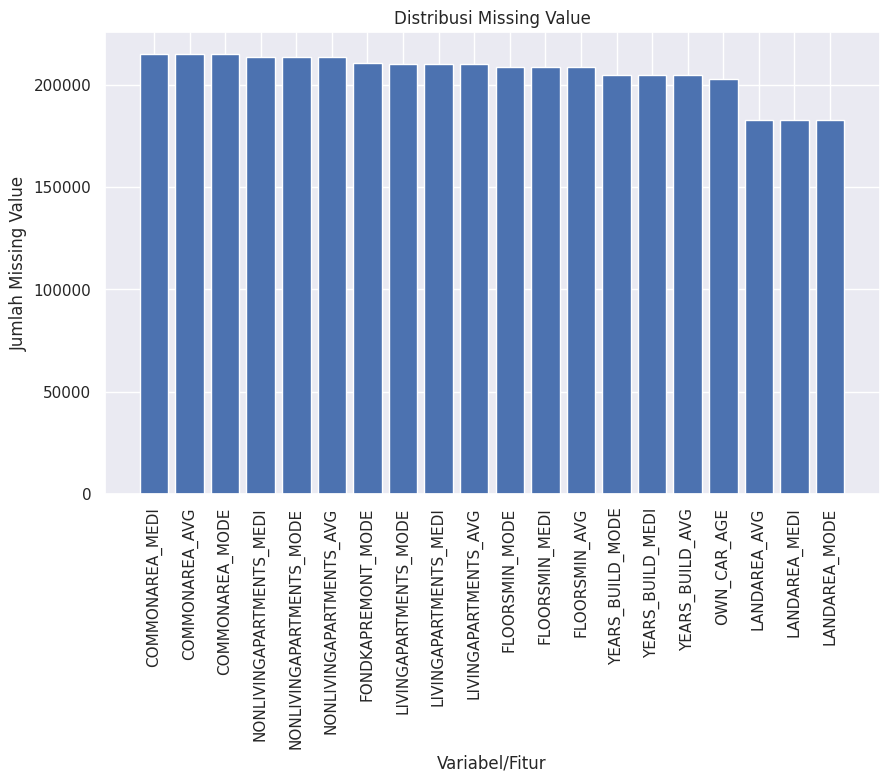

In [ ]:
missing_values = data_train.isnull().sum()

missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)
missing_values = missing_values[:20]

plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values)

plt.xlabel('Variabel/Fitur')
plt.ylabel('Jumlah Missing Value')
plt.title('Distribusi Missing Value')

plt.xticks(rotation=90)

plt.show()

## 3.3 Visualisasi

### 3.3.1 Visualisasi Target

Jumlah nasabah yang tidak dapat melunasi pinjaman tepat waktu:  24825 , ( 8.072881945686495 %)
Jumlah nasabah yang akan melunasi pinjaman tepat waktu:  282686 , ( 91.92711805431351 %)


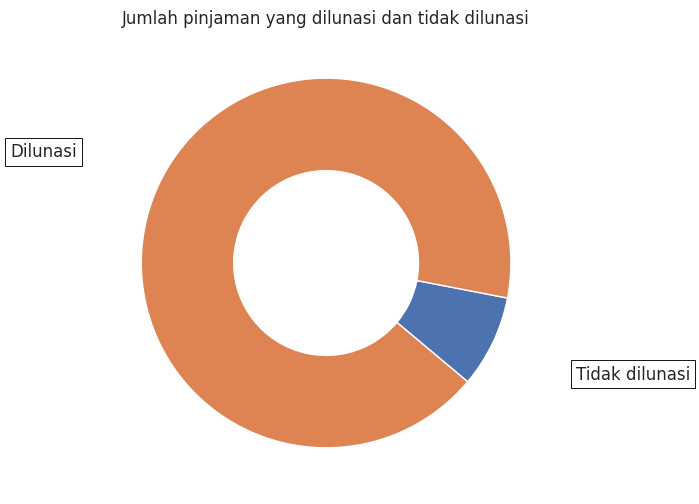

In [ ]:
y_value_counts = data_train['TARGET'].value_counts()
print("Jumlah nasabah yang tidak dapat melunasi pinjaman tepat waktu: ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Jumlah nasabah yang akan melunasi pinjaman tepat waktu: ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Tidak dilunasi", "Dilunasi"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5),\
                       startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Jumlah pinjaman yang dilunasi dan tidak dilunasi")

plt.show()

Dari chart tersebut dapat diketahui bahwa data yang dipakai adalah data yang tidak seimbang. Terlihat dari hanya 8,07% record untuk nasabah yang tidak mampu membayar (label kelas 1), dan 91,92% sisanya adalah nasabah yang dapat melunasi pinjaman tepat waktu (label kelas 0). Untuk data seperti ini dalam pemodelan dapat menggunakan metrik yang tidak terpengaruh oleh keseimbangan data seperti Skor ROC_AUC.

### 3.3.2 Anomali

Dari pengecekan data sebelumnya, ada beberapa kolom yang dicurigai memiliki anomali, yaitu terdapat pada kolom DAYS_EMPLOYED, DAYS_BIRTH, DAYS_REGISTRATION, dan DAYS_ID_PUBLISH

#### 3.3.2.1 Pengecekan Anomali Pada Kolom DAYS_EMPLOYED

In [ ]:
data_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
anom_days_employed = data_train[data_train['DAYS_EMPLOYED']==365243]
norm_days_employed = data_train[data_train['DAYS_EMPLOYED']!=365243]
print(anom_days_employed.shape)

dr_anom = anom_days_employed['TARGET'].mean()*100
dr_norm = norm_days_employed['TARGET'].mean()*100

print('Default rate (Anomaly): {:.2f}'.format(dr_anom))
print('Default rate (Normal): {:.2f}'.format(dr_norm))

pct_anom_days_employed = (anom_days_employed.shape[0]/data_train.shape[0])*100
print(pct_anom_days_employed)

(55374, 122)
Default rate (Anomaly): 5.40
Default rate (Normal): 8.66
18.00716071945394


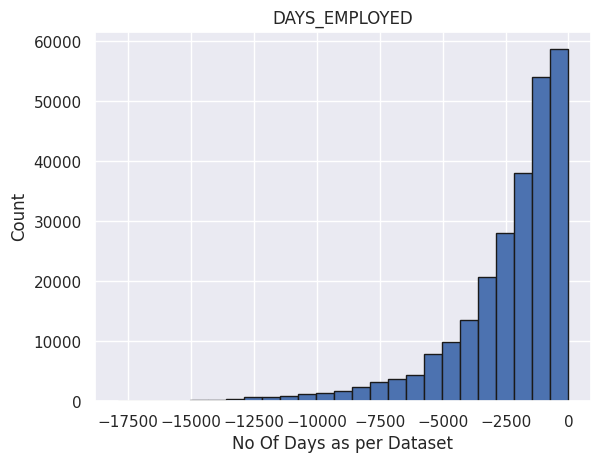

In [ ]:
df_app_train=data_train.copy()
df_app_train['DAYS_EMPLOYED_PLOT'] = df_app_train['DAYS_EMPLOYED'] == 365243
df_app_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)
plt.hist(df_app_train['DAYS_EMPLOYED'],edgecolor = 'k', bins = 25)
plt.title('DAYS_EMPLOYED'); plt.xlabel('No Of Days as per Dataset'); plt.ylabel('Count');

Setelah dilakukan pengecekan, pada kolom DAYS_EMPLOYED terdapat anomali sebesar 18%. Selanjutnya akan dilakukan handling pada proses data preparation


#### 3.3.2.2 Pengecekan Anomali Pada Kolom DAYS_BIRTH

In [ ]:
data_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [ ]:
anom_days_birth = data_train[data_train['DAYS_BIRTH']==365243]
norm_days_birth = data_train[data_train['DAYS_BIRTH']!=365243]
print(anom_days_birth.shape)

dr_anom = anom_days_birth['TARGET'].mean()*100
dr_norm = norm_days_birth['TARGET'].mean()*100

print('Default rate (Anomaly): {:.2f}'.format(dr_anom))
print('Default rate (Normal): {:.2f}'.format(dr_norm))

pct_anom_days_birth = (anom_days_birth.shape[0]/data_train.shape[0])*100
print(pct_anom_days_birth)

(0, 122)
Default rate (Anomaly): nan
Default rate (Normal): 8.07
0.0


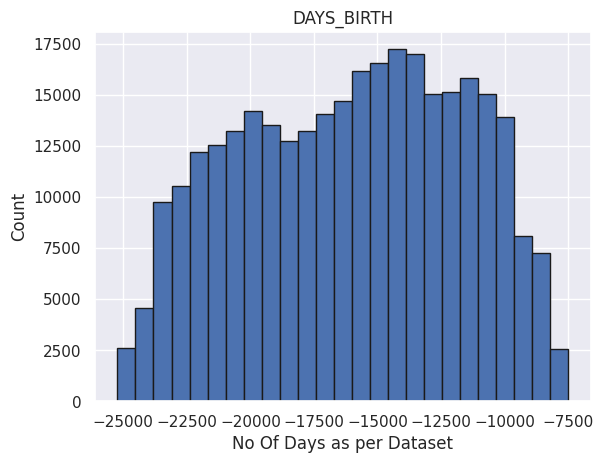

In [ ]:
df_app_train=data_train.copy()
df_app_train['DAYS_BIRTH_PLOT'] = df_app_train['DAYS_BIRTH'] == 365243
df_app_train['DAYS_BIRTH'].replace({365243:np.nan}, inplace=True)
plt.hist(df_app_train['DAYS_BIRTH'],edgecolor = 'k', bins = 25)
plt.title('DAYS_BIRTH'); plt.xlabel('No Of Days as per Dataset'); plt.ylabel('Count');

Untuk kolom DAYS_BIRTH ada keanehan karena semua datanya bernilai negatif. Namun, kolom ini juga merupakan fitur yang penting untuk menyelesaikan permasalahan home credit. Sehingga tidak bisa dihilangkan. Akan dilakukan handling pada tahap data preparation

#### 3.3.2.3 Pengecekan Anomali Pada Kolom DAYS_REGISTRATION

In [ ]:
data_train['DAYS_REGISTRATION'].describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [ ]:
anom_days_registration = data_train[data_train['DAYS_REGISTRATION']==365243]
norm_days_registration = data_train[data_train['DAYS_REGISTRATION']!=365243]
print(anom_days_registration.shape)

dr_anom = anom_days_registration['TARGET'].mean()*100
dr_norm = norm_days_registration['TARGET'].mean()*100

print('Default rate (Anomaly): {:.2f}'.format(dr_anom))
print('Default rate (Normal): {:.2f}'.format(dr_norm))

pct_anom_days_registration = (anom_days_registration.shape[0]/data_train.shape[0])*100
print(pct_anom_days_registration)

(0, 122)
Default rate (Anomaly): nan
Default rate (Normal): 8.07
0.0


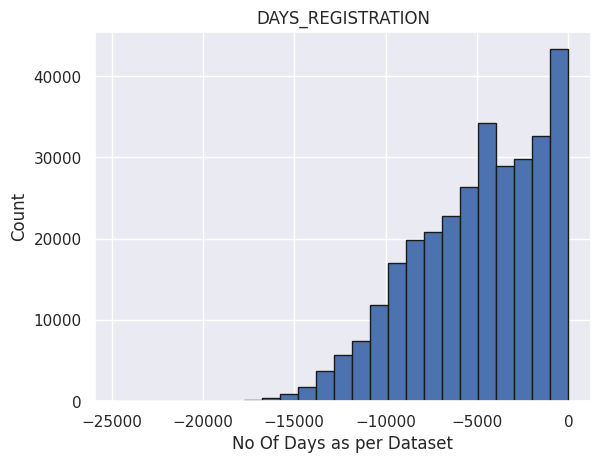

In [ ]:
df_app_train=data_train.copy()
df_app_train['DAYS_REGISTRATION_PLOT'] = df_app_train['DAYS_REGISTRATION'] == 365243
df_app_train['DAYS_REGISTRATION'].replace({365243:np.nan}, inplace=True)
plt.hist(df_app_train['DAYS_REGISTRATION'],edgecolor = 'k', bins = 25)
plt.title('DAYS_REGISTRATION'); plt.xlabel('No Of Days as per Dataset'); plt.ylabel('Count');

Setelah dilakukan pengecekan anomali, kolom DAYS_REGISTRATION tidak memiliki anomali. Berdasarkan deskripsi kolom DAYS_REGISTRATION merupakan jumlah hari sebelum aplikasi klien mengubah pendaftarannya. Jadi kemungkinan tanda - bukan memiliki arti negatif tetapi artinya hari sebelum pengubahan pendaftaran

#### 3.3.2.3 Pengecekan Anomali Pada Kolom DAYS_ID_PUBLISH

In [ ]:
data_train['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [ ]:
anom_days_ip = data_train[data_train['DAYS_ID_PUBLISH']==365243]
norm_days_ip = data_train[data_train['DAYS_ID_PUBLISH']!=365243]
print(anom_days_employed.shape)

dr_anom = anom_days_ip['TARGET'].mean()*100
dr_norm = norm_days_ip['TARGET'].mean()*100

print('Default rate (Anomaly): {:.2f}'.format(dr_anom))
print('Default rate (Normal): {:.2f}'.format(dr_norm))

pct_anom_days_ip = (anom_days_ip.shape[0]/data_train.shape[0])*100
print(pct_anom_days_ip)

(55374, 122)
Default rate (Anomaly): nan
Default rate (Normal): 8.07
0.0


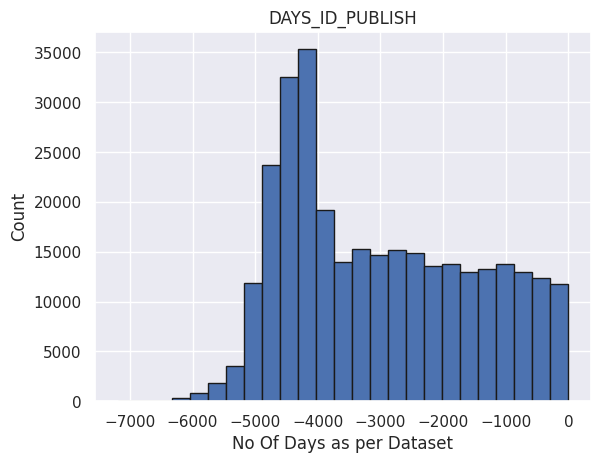

In [ ]:
df_app_train=data_train.copy()
df_app_train['DAYS_ID_PUBLISH_PLOT'] = df_app_train['DAYS_ID_PUBLISH'] == 365243
df_app_train['DAYS_ID_PUBLISH'].replace({365243:np.nan}, inplace=True)
plt.hist(df_app_train['DAYS_ID_PUBLISH'],edgecolor = 'k', bins = 25)
plt.title('DAYS_ID_PUBLISH'); plt.xlabel('No Of Days as per Dataset'); plt.ylabel('Count');

Setelah dilakukan pengecekan anomali, kolom DAYS_ID_PUBLISH tidak memiliki anomali. Berdasarkan deskripsi kolom DAYS_ID_PUBLISH merupakan jumlah hari sebelum aplikasi, klien mengubah dokumen identitas yang digunakannya untuk mengajukan pinjaman. Jadi kemungkinan tanda - bukan memiliki arti negatif tetapi artinya hari sebelum pengaplikasian

dari hasil pengecekan anomali ternyata hanya kolom DAYS_EMPLOYED saja yang memiliki anomali dan kolom DAYS_BIRTH yang memiliki keanehan dengan datanya. Untuk kolom sisanya yang kita curigai, tidak terdapat anomali

### 3.3.3 Univariate Analysis

In [ ]:
def stack_plot(data, xtick, col2='TARGET', col3='total'):
    ind = np.arange(data.shape[0])

    if len(data[xtick].unique())<5:
        plt.figure(figsize=(5,5))
    elif len(data[xtick].unique())>5 & len(data[xtick].unique())<10:
        plt.figure(figsize=(7,7))
    else:
        plt.figure(figsize=(15,15))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)
    plt.ylabel('Loans')
    plt.title('Number of loans aproved vs rejected')
    plt.xticks(ticks=ind,rotation=90,labels= list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('capable', 'not capable'))
    plt.show()


def univariate_barplots(data, col1, col2='TARGET', top=False):
    temp = pd.DataFrame(data_train.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()
    temp['total'] = pd.DataFrame(data_train.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data_train.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    if top:
        temp = temp[0:top]
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(7))

#### 3.3.3.1 Univariate Analysis NAME-CONTRACT-TYPE

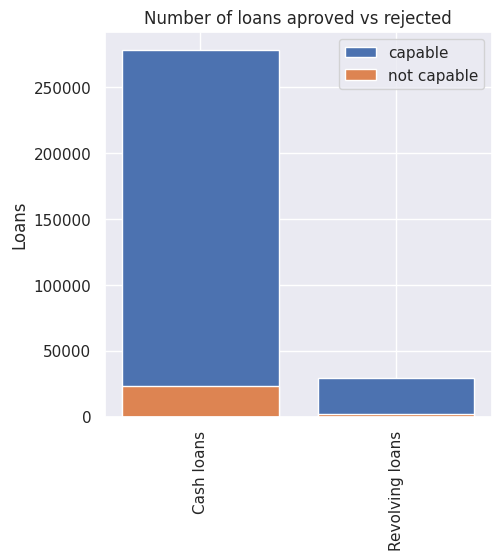

  NAME_CONTRACT_TYPE  TARGET   total       Avg
0         Cash loans   23221  278232  0.083459
1    Revolving loans    1604   29279  0.054783


In [ ]:
univariate_barplots(data_train, 'NAME_CONTRACT_TYPE', 'TARGET', False)

Dari chart tersebut dilihat lebih banyak nasabah meminjam uang secara langsung dari pada dengan revolving seperti menggunakan kartu kredit

#### 3.3.3.2 Univariate Analysis CODE_GENDER

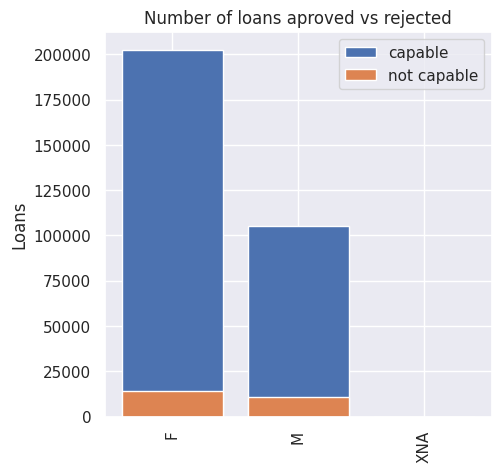

  CODE_GENDER  TARGET   total       Avg
0           F   14170  202448  0.069993
1           M   10655  105059  0.101419
2         XNA       0       4  0.000000


In [ ]:
univariate_barplots(data_train, 'CODE_GENDER', 'TARGET', False)

### 3.3.4 Bivariate Analysis

#### 3.3.4.1 Boxplot NAME_CONTRACT_TYPE, AMT_CREDIT, CODE_GENDER

In [ ]:
def generic_xy_boxplot(xaxisfeature,yaxisfeature,legendcategory,data,log_scale):
  sns.boxplot(x=xaxisfeature, y=yaxisfeature, hue = legendcategory, data = data)
  plt.title('Boxplot for '+ xaxisfeature +' with ' + yaxisfeature+' and '+legendcategory,fontsize=10)
  if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{yaxisfeature} (log Scale)')
                plt.tight_layout()

def box_plot(plots):
  number_of_subplots = len(plots)
  plt.figure(figsize = (20,8))
  sns.set_style('whitegrid')
  for i, ele in enumerate(plots):
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)
        xaxisfeature=ele[0]
        yaxisfeature=ele[1]
        legendcategory=ele[2]
        data=ele[3]
        log_scale=ele[4]
        generic_xy_boxplot(xaxisfeature,yaxisfeature,legendcategory,data,log_scale)

In [ ]:
plots=[['NAME_CONTRACT_TYPE','AMT_CREDIT','CODE_GENDER',data_train,False]]

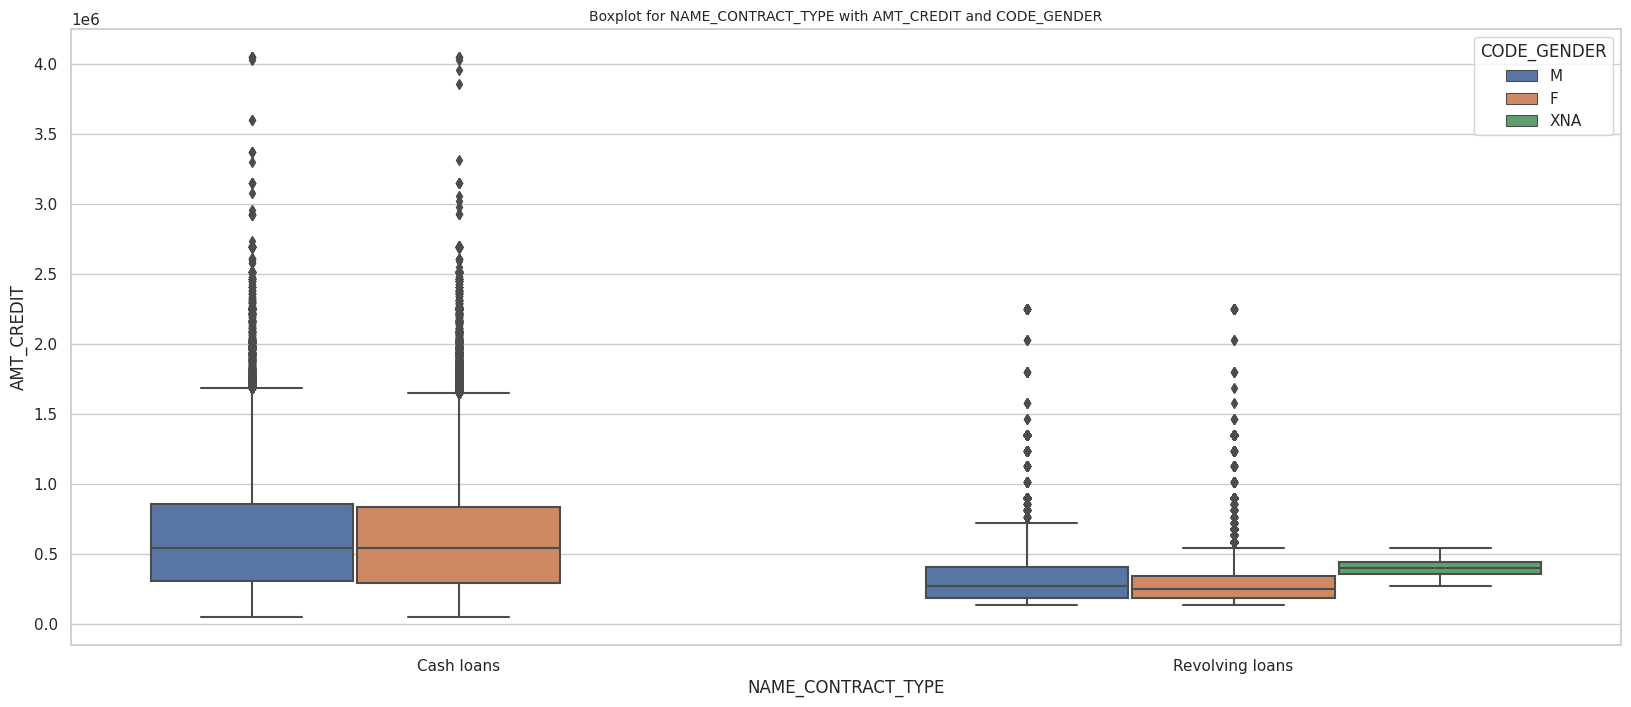

In [ ]:
box_plot(plots)

1. Gender tidak terlalu memberikan dampak ke peminjaman karena antara laki-laki dan perempuan jumlahnya hampir sama. Tapi, perbedaan credit amount sangat terlihat jelas antara peminjaman secara cash dan revolving.
2. Ini tidak bisa dibilang outlier karena bisa saja memang ada beberapa nasabah yang meminjam uang dalam jumlah besar

#### 3.3.4.2 Korelasi Antar Kolom

Top 20 korelasi (positif dan negatif)

In [ ]:
correlations = data_train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


Nilai korelasi yang mendekati -1 atau +1 artinya menyatakan hubungan yang makin kuat. Nilai di atas nol akan menunjukkan korelasi positif, sedangkan nilai di bawah nol berarti menunjukkan korelasi negatif. Nilai positif menunjukan arah hubungan searah. sedangkan nilai negatif adalah sebaliknya.
Artinya, apabila kolom yang termasuk dalam 'Most Positive Correlations' meningkat maka target juga akan meningkat. Begitupun sebaliknya
Sedangkan, apabila kolom yang termasuk dalam 'Most Negative Correlations' meningkat maka target akan mnurun, dan sebaliknya.

Plot Distribusi Top 20 korelasi

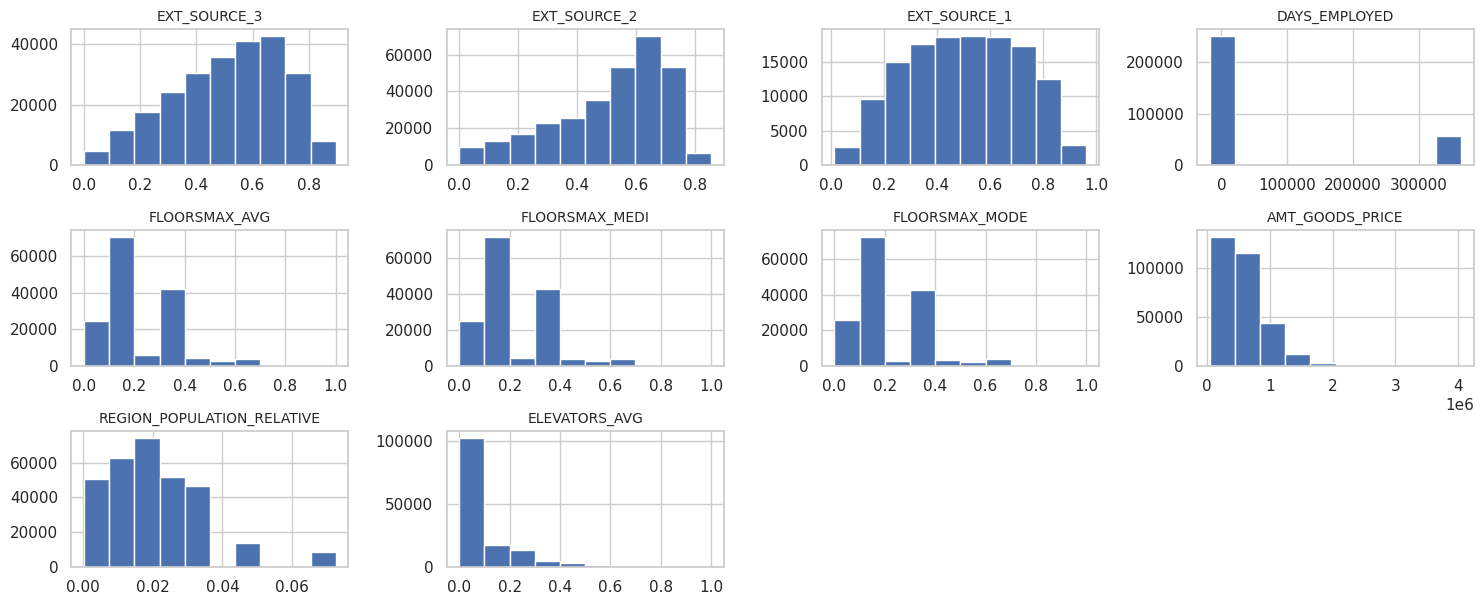

In [ ]:
# Negative korelasi
var_neg_corr = correlations.head(10).index.values
numVar = var_neg_corr.shape[0]

plt.figure(figsize=(15,20))
for i,var in enumerate(var_neg_corr):
    dflt_var = data_train.loc[data_train['TARGET']==1,var]
    dflt_non_var = data_train.loc[data_train['TARGET']==0,var]

    plt.subplot(numVar,4,i+1)
    data_train[var].hist()
    plt.title(var, fontsize = 10)
    plt.tight_layout()
plt.show()

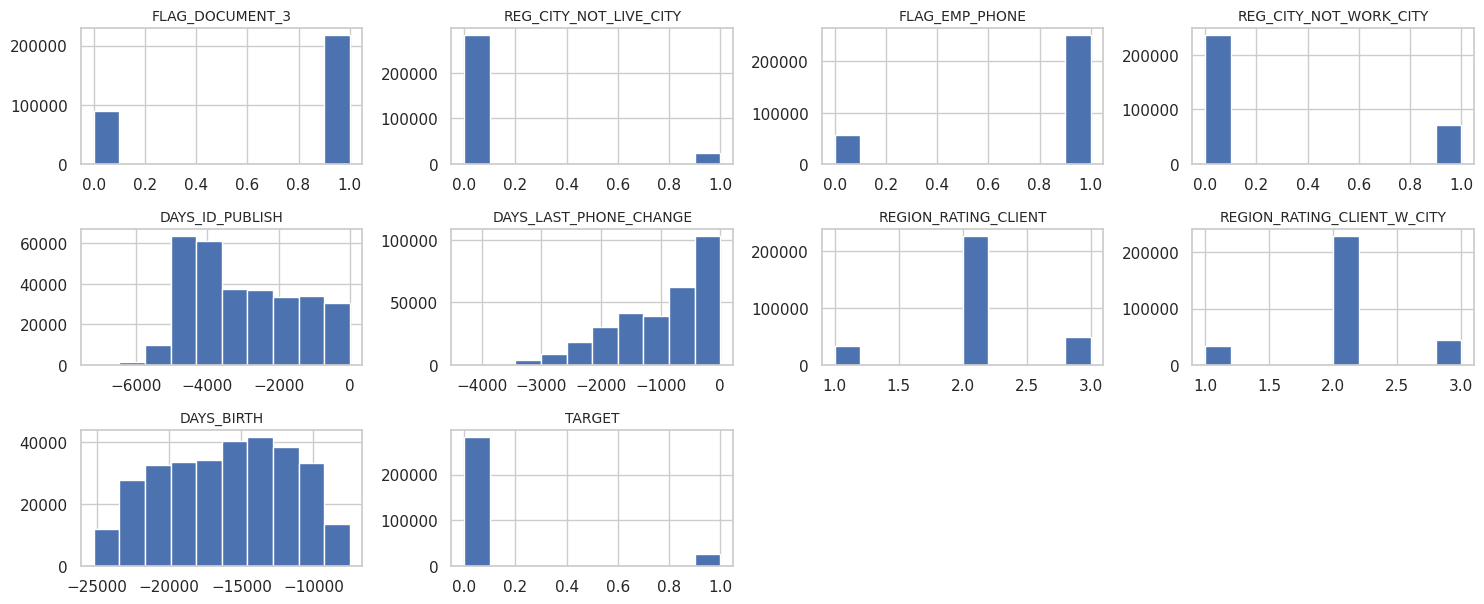

In [ ]:
#positive korelasi
var_pos_corr = correlations.tail(10).index.values
numVar = var_pos_corr.shape[0]

plt.figure(figsize=(15,20))
for i,var in enumerate(var_pos_corr):
    dflt_var = data_train.loc[data_train['TARGET']==1,var]
    dflt_non_var = data_train.loc[data_train['TARGET']==0,var]

    plt.subplot(numVar,4,i+1)
    data_train[var].hist()
    plt.title(var, fontsize = 10)
    plt.tight_layout()
plt.show()

#### 3.3.4.3 Korelasi Numerik Variabel

In [ ]:
num_attribs = ['TARGET', 'AMT_INCOME_TOTAL',  'AMT_CREDIT', 'DAYS_EMPLOYED',
               'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_GOODS_PRICE']
df = data_train.copy()
df2 = df[num_attribs]
corr = df2.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_GOODS_PRICE
TARGET,1.00,-0.00,-0.03,-0.04,0.08,-0.16,-0.16,-0.18,-0.04
AMT_INCOME_TOTAL,-0.00,1.00,0.16,-0.06,0.03,0.03,0.06,-0.03,0.16
AMT_CREDIT,-0.03,0.16,1.00,-0.07,-0.06,0.17,0.13,0.04,0.99
DAYS_EMPLOYED,-0.04,-0.06,-0.07,1.00,-0.62,0.29,-0.02,0.11,-0.06
DAYS_BIRTH,0.08,0.03,-0.06,-0.62,1.00,-0.60,-0.09,-0.21,-0.05
EXT_SOURCE_1,-0.16,0.03,0.17,0.29,-0.60,1.00,0.21,0.19,0.18
EXT_SOURCE_2,-0.16,0.06,0.13,-0.02,-0.09,0.21,1.00,0.11,0.14
EXT_SOURCE_3,-0.18,-0.03,0.04,0.11,-0.21,0.19,0.11,1.00,0.05
AMT_GOODS_PRICE,-0.04,0.16,0.99,-0.06,-0.05,0.18,0.14,0.05,1.00


1. Korelasinya kuat antara amount credit dan amount goods price
2. Korelasi kuat antara days birth dan days employed
3. Korelasi kuat antara ext source 1 dan days employed
4. Ini kemungkinan bisa menjadi kandidat yang baik untuk melakukan beberapa feature engineering.


# 4. Data Preparation

Pada tahap ini akan dilakukan tindakan untuk mengatasi missing value setelah dilakukan pengecekan missing value sebelumnya.
Berdasarkan hasil perhitungan missing value sebelumnya untuk mengatasinya akan dilakukan penghapusan data yang missing valuenya lebih dari



## 4.1 Missing Value Handling

In [ ]:
data_train.drop(data_train.iloc[:, 44:91], inplace=True, axis=1)
data_train.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

Disini dilakukan penghapusan kolom-kolom dari indeks kolom ke-44 hingga indeks kolom ke-90 dari dataset. Karena dari rentang tersebut terdapat missing value dengan persentase 45% hingga hampir 70% serta dilakukan penghapusan kolom 'OWN_CAR_AGE' dan 'EXT_SOURCE_1' secara terpisah karena kolom tersebut memiliki missing value dengan persentase diatas 50%

Selanjutnya adalah menghapus kolom SK_ID_CURR karena kolom ini tidak memberikan informasi langsung tentang karakteristik atau atribut lain dari pelamar

In [ ]:
# Menghapus kolom SK_ID_CURR
data_train = data_train.drop(["SK_ID_CURR"], axis=1)

In [ ]:
data_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Mengisi missing value dengan median
category = data_train.select_dtypes(include=['object']).columns.tolist()
int = data_train.select_dtypes(include=['int64','float64']).columns.tolist()

for column in data_train:
    if data_train[column].isnull().any():
        if(column in category):
            data_train[column]=data_train[column].fillna(data_train[column].mode()[0])
        else:
            data_train[column]=data_train[column].fillna(data_train[column].median())

In [ ]:
# Cek Missing Value
missing_value = data_train.isnull().sum().reset_index()
missing_value.columns = ['feature','missing_value']
missing_value['percentage'] = round((missing_value['missing_value']/len(data_train))*100,5)
missing_value = missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
missing_value = missing_value[missing_value['percentage']>0]
print("Your selected dataframe has " + str(data_train.shape[1]) + " columns.\n"
      "There are " + str(missing_value.shape[0]) +" columns that have missing values.")
missing_value

Your selected dataframe has 72 columns.
There are 0 columns that have missing values.


,feature,missing_value,percentage


##4.2 Anomali Handling

Setelah dilakukan pengecekan anomali sebelumnya ditemukan bahwa terdapat anomali pada kolom 'DAYS_EMPLOYED' sebesar 18 persen serta psada kolom  'DAYS_BIRTH' tidak ditemukan adanya anomali namun ditemukan keanehan  karena semua datanya bernilai negatif. Oleh karena itu akan dilakukan handling

###Handling anomali pada kolom 'DAYS_EMPLOYED'

In [ ]:
# Menghitung jumlah anomali pada kolom DAYS_EMPLOYED
total_rows = len(data_train)
anomaly_count = len(data_train[data_train['DAYS_EMPLOYED'] > 0])
anomaly_percentage = (anomaly_count / total_rows) * 100

# Menampilkan persentase anomali
print("Persentase Anomali pada kolom DAYS_EMPLOYED : {:.2f}%".format(anomaly_percentage))

Persentase Anomali pada kolom DAYS_EMPLOYED : 18.01%


In [ ]:
# Mengisi anomali pada kolom DAYS_EMPLOYED menggunakan nilai median
median_days_employed = data_train['DAYS_EMPLOYED'].median()
data_train.loc[data_train['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = median_days_employed

# Mengecek kembali anomali
anomaly_count = len(data_train[data_train['DAYS_EMPLOYED'] > 0])
print("Jumlah Anomali setelah handling:", anomaly_count)

Jumlah Anomali setelah handling: 0


###Handling kolom 'DAYS_BIRTH'

Pada kolom 'DAYS_BIRTH' mengandung informasi tentang jumlah hari sejak tanggal lahir pelamar hingga saat pengajuan pinjaman. Nilai dalam kolom ini adalah angka negatif yang menunjukkan jumlah hari sejak tanggal lahir hingga saat pengajuan pinjaman.

Untuk mengubah nilai dalam kolom ini menjadi usia dalam satuan tahun, bisa diatasi dengan mengalikan nilanya dengan -1 dan membaginya dengan 365.25 (rata-rata jumlah hari dalam setahun, termasuk tahun kabisat).

In [ ]:
# Convert DAYS_BIRTH menjadi AGE
data_train['AGE'] = -data_train['DAYS_BIRTH'] / 365.25

# Menampilkan data head dari kolom DAYS_BIRTH dan AGE
print(data_train[['DAYS_BIRTH', 'AGE']].head())

   DAYS_BIRTH        AGE
0       -9461  25.902806
1      -16765  45.900068
2      -19046  52.145106
3      -19005  52.032854
4      -19932  54.570842


Karena kolom DAYS_BIRTH tidak mengandung anomali maka pada kolom AGE tidak dilakukan handling anomali

###Menyimpan data menjadi CSV

In [ ]:
# Menyimpan data yang sudah bersih untuk membuat dashboard
data_train.to_csv(r'data_train.csv')

## 4.3 Data Encoding

Setelah tidak ditemukan Missing Value selanjutnya akan dilakukan Encoding. Dengan mengubah variabel kategorikal menjadi bentuk numerik, kita dapat memasukkan semua fitur data dalam bentuk numerik ke dalam algoritma pemodelan, yang umumnya hanya menerima input numerik.



In [ ]:
# Buat Objek Label Encoder
le = LabelEncoder()
le_count = 0

for col in data_train:
    if data_train[col].dtype == 'object':
        # Jika terdapat 2 atau lebih unique categories
        if len(list(data_train[col].unique())) >= 2:
            le.fit(data_train[col])
            data_train[col] = le.transform(data_train[col])

            # Untuk memeriksa jumlah kolom yang berhasil di Encode
            le_count += 1

print('%d Kolom sudah di Encode.' % le_count)

0 Kolom sudah di Encode.


In [ ]:
data_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.902806
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.900068
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.145106
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.032854
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.570842


In [ ]:
# Menghitung tipe data setiap kolom
data_train.dtypes.value_counts()

int64      52
float64    21
dtype: int64

Semua kolom yang berupa kategori sudah di encode menjadi numerik

In [ ]:
# one-hot encoding of categorical variables
data_train = pd.get_dummies(data_train)

print('Training Features shape: ', data_train.shape)

Training Features shape:  (307511, 73)


One-Hot Encoding merupakan teknik yang digunakan untuk mengubah variabel kategorikal menjadi bentuk numerik yang dapat digunakan oleh algoritma pemodelan.
One-Hot Encoding menghasilkan beberapa kolom baru, di mana setiap kolom mewakili suatu kategori dengan nilai biner.

## 4.4 Best Feature

In [ ]:
# Memisahkan fitur dan target
X = data_train.drop('TARGET', axis=1)
y = data_train['TARGET']

# Membuat instance dari Random Forest Classifier
rf = RandomForestClassifier()

# Melakukan training pada model Random Forest
rf.fit(X, y)

# Mengambil feature importance dari model
feature_importance = rf.feature_importances_

# Membuat DataFrame dengan feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Mengurutkan DataFrame berdasarkan feature importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Menampilkan fitur terbaik
print(feature_importance_df)


                        Feature    Importance
38                 EXT_SOURCE_2  7.354996e-02
39                 EXT_SOURCE_3  6.582506e-02
18              DAYS_ID_PUBLISH  5.145976e-02
17            DAYS_REGISTRATION  5.122337e-02
15                   DAYS_BIRTH  4.943008e-02
71                          AGE  4.932326e-02
7                   AMT_ANNUITY  4.709938e-02
16                DAYS_EMPLOYED  4.709214e-02
44       DAYS_LAST_PHONE_CHANGE  4.559502e-02
6                    AMT_CREDIT  4.278988e-02
5              AMT_INCOME_TOTAL  3.867792e-02
14   REGION_POPULATION_RELATIVE  3.844660e-02
8               AMT_GOODS_PRICE  3.607067e-02
30      HOUR_APPR_PROCESS_START  3.357200e-02
37            ORGANIZATION_TYPE  2.841349e-02
70   AMT_REQ_CREDIT_BUREAU_YEAR  2.334566e-02
29   WEEKDAY_APPR_PROCESS_START  2.331140e-02
25              OCCUPATION_TYPE  2.201855e-02
40     OBS_30_CNT_SOCIAL_CIRCLE  1.792940e-02
42     OBS_60_CNT_SOCIAL_CIRCLE  1.779368e-02
12           NAME_FAMILY_STATUS  1

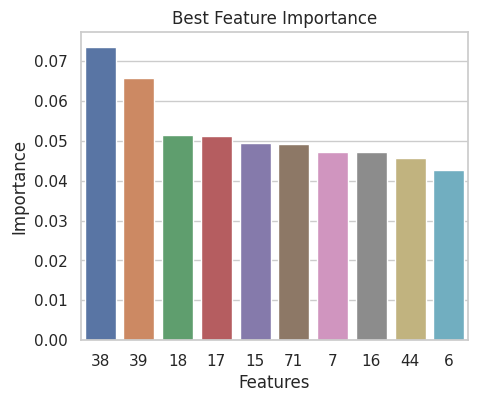

In [ ]:
# Menampilkan fitur terbaik
top_10_features = feature_importance_df.head(10)

plt.figure(figsize=(5, 4))
sns.barplot(x=top_10_features.index, y=top_10_features['Importance'], order=top_10_features.index)
plt.title('Best Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=0)
plt.show()

Untuk memilih best feature, kita menggunakan algoritma Random Forest Classifier dari library scikit-learn untuk menghitung feature importance dari setiap fitur dalam dataset. Setelah melakukan training pada model Random Forest, kita mendapatkan nilai feature importance dari model tersebut. Kemudian, nilai feature importance disimpan dalam DataFrame dan diurutkan berdasarkan nilai importance secara menurun.

Berdasarkan output diatas kita dapat mengambil keputusan untuk memilih fitur-fitur dengan nilai feature importance yang tinggi sebagai fitur terbaik dalam analisis kita. Fitur-fitur dengan nilai importance yang rendah mungkin dapat dihapus atau tidak digunakan dalam pemodelan atau analisis lebih lanjut.

# 5. Modeling

In [ ]:
#mengubah negative value menjadi positive value
data_train.iloc[:,16:20] = data_train.iloc[:,16:20].abs()
data_train.iloc[:,45] = data_train.iloc[:,45].abs()

In [ ]:
#Feature selection
x = data_train.drop(['TARGET'], axis=1)
y = data_train['TARGET']

In [ ]:
#Feature selection
best = SelectKBest(score_func=chi2, k=10)
fit = best.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Feature', 'Score']
featureScores.sort_values(by=['Score'], ascending=False)

,Feature,Score
8,AMT_GOODS_PRICE,1.223080e+08
6,AMT_CREDIT,7.669987e+07
16,DAYS_EMPLOYED,2.306691e+06
15,DAYS_BIRTH,2.235391e+06
5,AMT_INCOME_TOTAL,1.624102e+06
17,DAYS_REGISTRATION,1.348566e+06
44,DAYS_LAST_PHONE_CHANGE,6.656876e+05
18,DAYS_ID_PUBLISH,6.195946e+05
7,AMT_ANNUITY,3.913092e+05
71,AGE,6.120167e+03


In [ ]:
#handling imbalance
df_most = data_train[(data_train['TARGET']==0)]
df_min = data_train[(data_train['TARGET']==1)]

df_min_upsampled = resample(df_min, replace=True, n_samples= 282686, random_state=42)
df_upsampled = pd.concat([df_min_upsampled, df_most])

setelah melakukan handling imbalance, selanjutnya dilakukan Distribution Repayment Abilities

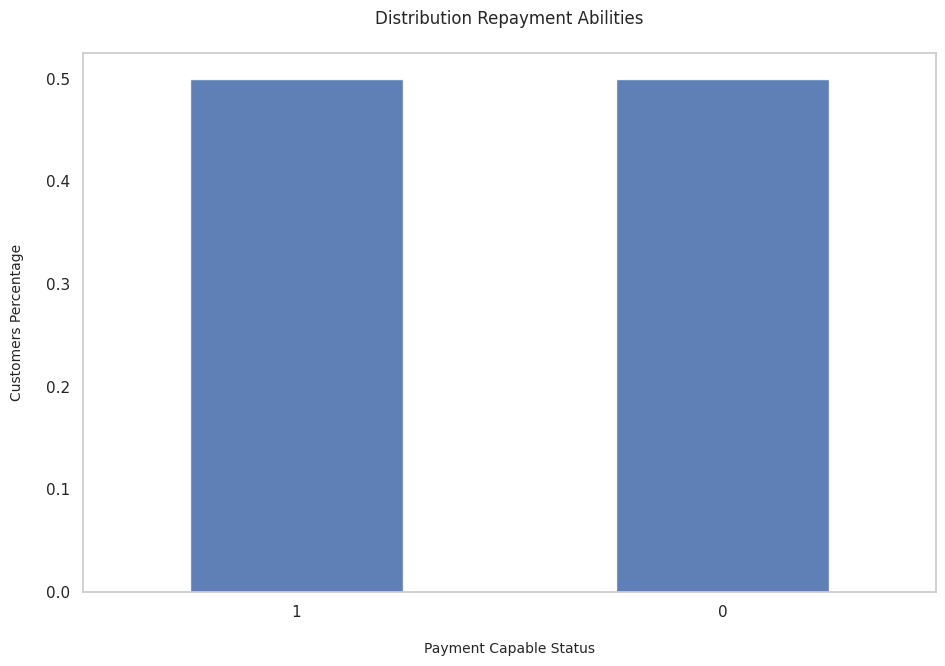

In [ ]:
#Distribution Repayment Abilities
fig = plt.figure(figsize = (11,7))
df_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', alpha = 0.9, rot=0)
plt.title('Distribution Repayment Abilities\n', fontsize=12)
plt.ylabel('Customers Percentage\n', fontsize=10)
plt.xlabel('\nPayment Capable Status', fontsize=10)
plt.grid(False)
plt.show()

##5.1 Data Split Untuk Model

In [ ]:
data_train.head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,5,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.902806
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,39,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.900068
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.145106
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.032854
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.570842


In [ ]:
#split data untuk model
x_balanced = df_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT',
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION',
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY',
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y_balanced = df_upsampled['TARGET']

In [ ]:
# Split
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 20) (113075, 20)


In [ ]:
# Normalize pakai fitur StandardScaler
scal = StandardScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.fit_transform(X_test)

##5.2 Model Logistic Regression

In [ ]:
# Logistic Regression
logistic_model = LogisticRegression().fit(X_train, y_train)

# prediksi data train
y_train_pred_log = logistic_model.predict(X_train)

# report
print('Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.68      0.68    226185
           1       0.68      0.66      0.67    226112

    accuracy                           0.67    452297
   macro avg       0.67      0.67      0.67    452297
weighted avg       0.67      0.67      0.67    452297



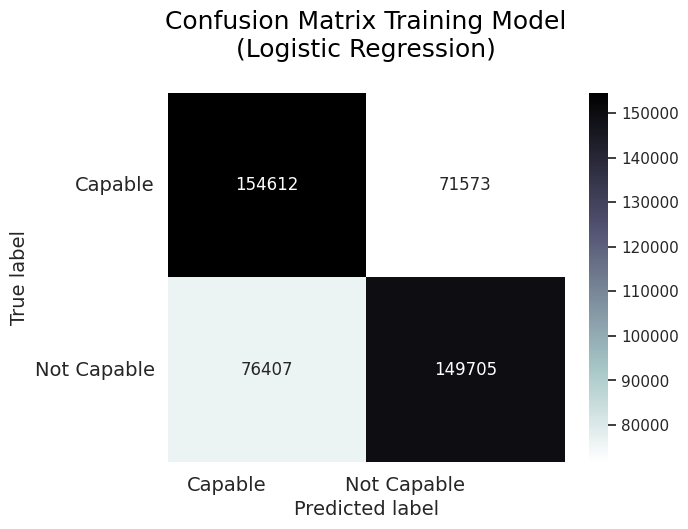

In [ ]:
#membuat confusion matrix training model
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('Capable', 'Not Capable'), ('Capable', 'Not Capable'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 12}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

berdasarkan hasil dari confusion matrix training model, dapat dilihat bahwa :
- sebesar 154612 klien mampu untuk membayar pinjaman dan prediksi benar menunjukkan bahwa 154612 klien mampu membayar pinjaman, ini adalah true positif
- sebesar 149705 klien tidak mampu untuk membayar pinjaman dan prediksi benar menunjukkan bahwa 149705 klien tidak mampu membayar pinjaman, ini adalah true negatif
- sebesar 76407 klien tidak mampu untuk membayar pinjaman namun prediksi menunjukkan bahwa 76407 klien mampu membayar pinjaman, ini adalah false positif
- sebesar 71573 klien mampu untuk membayar pinjaman namun prediksi menunjukkan bahwa 71573 klien tidak mampu membayar pinjaman, ini adalah false negatif

In [ ]:
# prediksi data test
y_test_pred_log = logistic_model.predict(X_test)

# report
print('Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.68      0.68     56501
           1       0.68      0.66      0.67     56574

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075



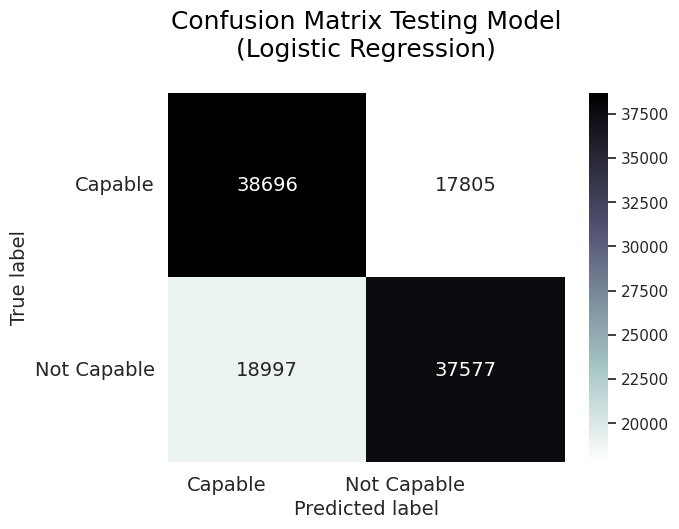

In [ ]:
#membuat confusion matrix training model
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('Capable', 'Not Capable'), ('Capable', 'Not Capable'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

berdasarkan hasil dari confusion matrix training model, dapat dilihat bahwa :
- sebesar 38696 klien mampu untuk membayar pinjaman dan prediksi menunjukkan bahwa 38696 klien mampu untuk membayar pinjaman, ini adalah true positif
- sebesar 37577 klien tidak mampu untuk membayar pinjaman dan prediksi menunjukkan bahwa 37577 klien tidak mampu untuk membayar pinjaman, ini adalah true negatif
- sebesar 18997 klien tidak mampu untuk membayar pinjaman namun prediksi menunjukkan bahwa 18997 klien mampu untuk membayar pinjaman, ini adalah false positif
- sebesar 17805 klien mampu untuk membayar pinjaman namun prediksi menunjukkan bahwa 17805 klien tidak mampu untuk membayar pinjaman, ini adalah false negatif

selanjutnya kita akan melihat nilai train accuracy, test accuracy dan ROC AUC score

In [ ]:
acc_log_train=round(logistic_model.score(X_train,y_train)*100,2) #train accuracy
acc_log_test=round(logistic_model.score(X_test,y_test)*100,2) #test accuracy
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4) #ROC AUC score

print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))
print('ROC AUC:', roc_auc_log)

Training Accuracy: % 67.28
Test Accuracy: % 67.45
ROC AUC: 0.6745


- Logistic Regression Model 67.45% accuracy.

- 67.45 - 67.28 = 0.17% Error Margin.

- ROC AUC = 0.6745

##5.3 Model Random Forest

In [ ]:
# Random Forest Model
random_model = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
# Prediksi Data Train
y_train_pred_dt = random_model.predict(X_train)

# Report
print('Report Training Model (Random Forest Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226185
           1       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



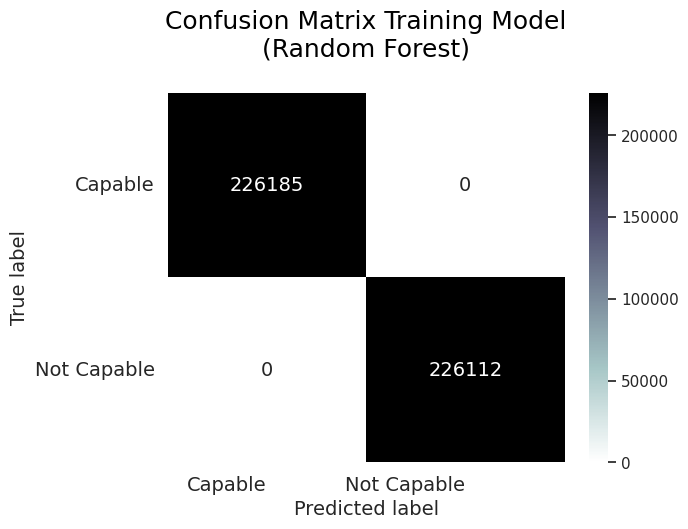

In [ ]:
#membuat confusion mtrix training model
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('Capable', 'Not Capable'), ('Capable', 'Not Capable'))

# Confusion Matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

beradsarkan hasil dari confusion matrix training model, dapat dilihat bahwa :
- sebesar 226185 klien mampu untuk membayar pinjaman dan prediksi menunjukkan bahwa 226185 klien mampu untuk membayar pinjaman, ini adalah true positif
- sebesar 226112 klien tidak mampu untuk membayar pinjaman dan prediksi menunjukkan bahwa 226112 klien tidak mampu untuk membayar pinjaman, ini adalah true negatif
- sebesar 0 klien tidak mampu untuk membayar pinjaman namun prediksi menunjukkan bahwa 0 klien mampu untuk membayar pinjaman, ini adalah false positif
- sebesar 0 klien mampu untuk membayar pinjaman namun prediksi menunjukkan bahwa 0 klien tidak mampu untuk membayar pinjaman, ini adalah false negatif

In [ ]:
# Prediksi Data Test
y_test_pred_rf = random_model.predict(X_test)

# Report
print('Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56501
           1       0.99      1.00      1.00     56574

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



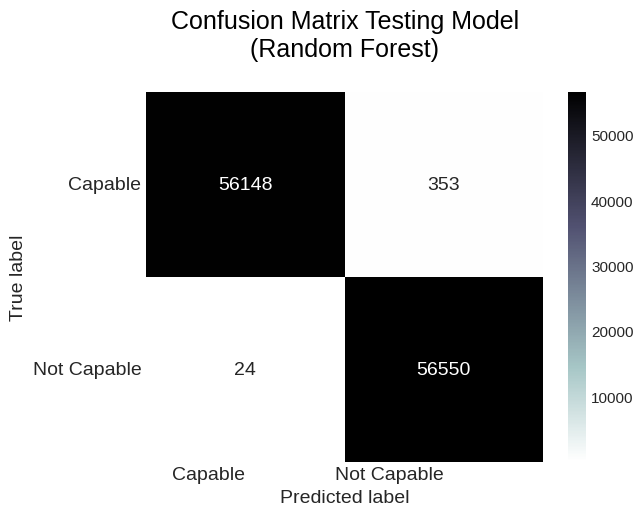

In [ ]:
#membuat confusion mtrix training model
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('Capable', 'Not Capable'), ('Capable', 'Not Capable'))

# Confusion Matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

beradsarkan hasil dari confusion matrix training model, dapat dilihat bahwa :
- sebesar 56148 klien mampu untuk membayar pinjaman dan prediksi menunjukkan bahwa 56148 klien mampu untuk membayar pinjaman, ini adalah true positif
- sebesar 56550 klien tidak mampu untuk membayar pinjaman dan prediksi menunjukkan bahwa 56550 klien tidak mampu untuk membayar pinjaman, ini adalah true negatif
- sebesar 24 klien tidak mampu untuk membayar pinjaman namun prediksi menunjukkan bahwa 24 klien mampu untuk membayar pinjaman, ini adalah false positif
- sebesar 353 klien mampu untuk membayar pinjaman namun prediksi menunjukkan bahwa 353 klien tidak mampu untuk membayar pinjaman, ini adalah false negatif

selanjutnya kita akan melihat nilai train accuracy, test accuracy dan ROC AUC score

In [ ]:
acc_rf_train=round(random_model.score(X_train,y_train)*100,2) #train accuracy
acc_rf_test=round(random_model.score(X_test,y_test)*100,2) #test accuracy
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4) #ROC AUC score

print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))
print('ROC AUC:', roc_auc_rf)

Training Accuracy: % 100.0
Test Accuracy: % 99.67
ROC AUC: 0.9967


- Random Forest Model 99.67% accuracy.

- 100 - 99.67 = 0.33% Error Margin.

- ROC AUC = 0.9967

selanjutnya membuat feature importance yang bertujuan untuk menunjukkan seberapa pentingnya sebuah feature

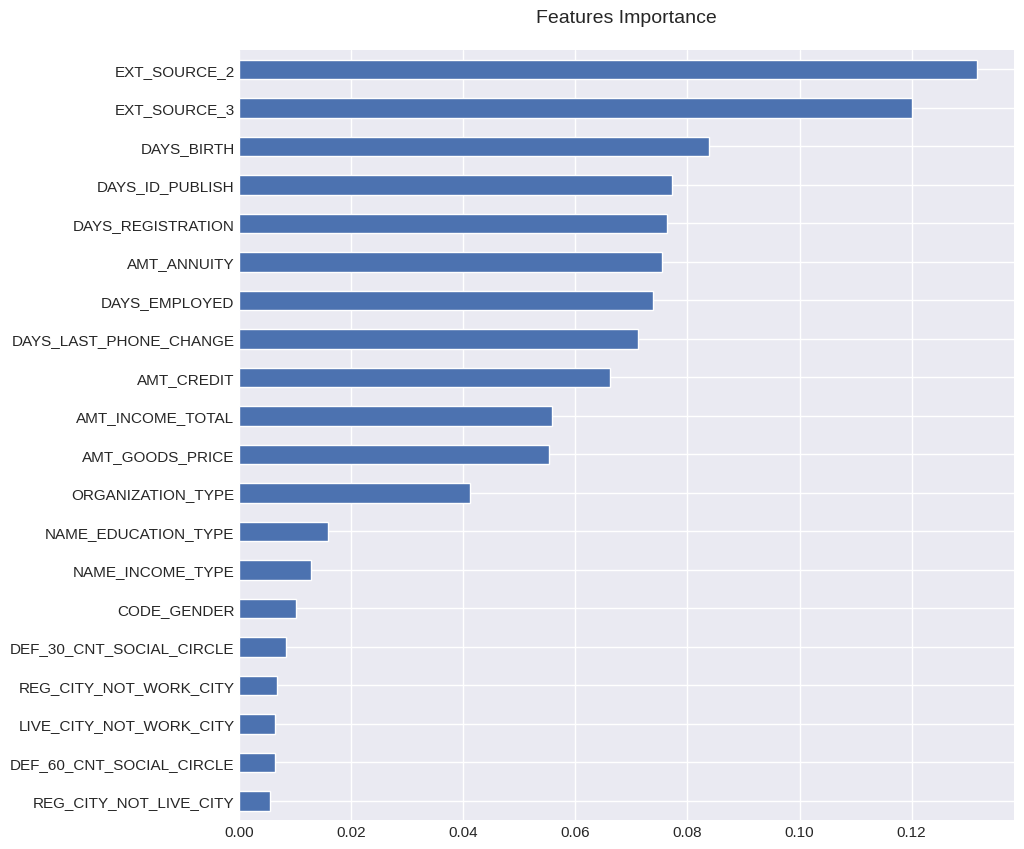

In [ ]:
# Fitur Terbaik
importances_rf = pd.Series(random_model.feature_importances_, index=x_balanced.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh')
plt.title('Features Importance\n', fontsize=14)

plt.show()

fig.figure.tight_layout()

##5.4 Model Decision Tree

In [ ]:
# Random Decision Tree
tree_model = DecisionTreeClassifier().fit(X_train, y_train)

# Prediksi Data Train
y_train_pred_t = tree_model.predict(X_train)

# Report
print('Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_t))

Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226185
           1       1.00      1.00      1.00    226112

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



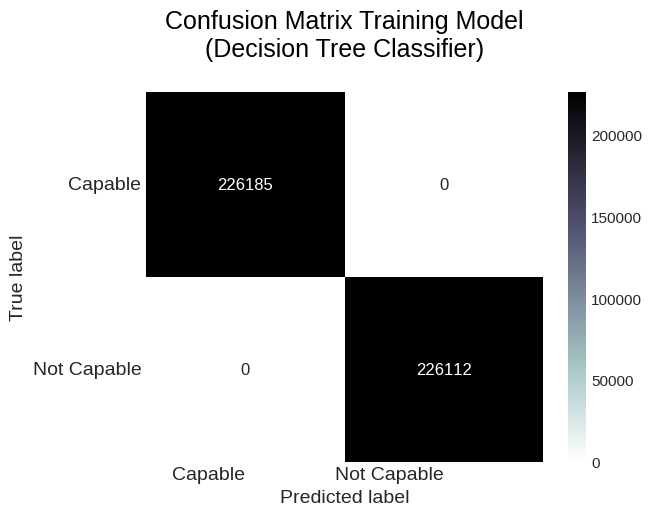

In [ ]:
#membuat confusion matrix training model
confusion_matrix_tree = pd.DataFrame((confusion_matrix(y_train, y_train_pred_t)), ('Capable', 'Not Capable'), ('Capable', 'Not Capable'))

#Confusion Matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_tree, annot=True, annot_kws={'size': 12}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Training Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

beradsarkan hasil dari confusion matrix training model, dapat dilihat bahwa :
- sebesar 226185 klien mampu untuk membayar pinjaman dan prediksi menunjukkan bahwa 226185 klien mampu untuk membayar pinjaman, ini adalah true positif
- sebesar 226112 klien tidak mampu untuk membayar pinjaman dan prediksi menunjukkan bahwa 226112 klien tidak mampu untuk membayar pinjaman, ini adalah true negatif
- sebesar 0 klien tidak mampu untuk membayar pinjaman namun prediksi menunjukkan bahwa 0 klien mampu untuk membayar pinjaman, ini adalah false positif
- sebesar 0 klien mampu untuk membayar pinjaman namun prediksi menunjukkan bahwa 0 klien tidak mampu untuk membayar pinjaman, ini adalah false negatif

In [ ]:
# Prediksi Data Test
y_test_pred_ts = tree_model.predict(X_test)

# Report
print('Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_ts))

Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     56501
           1       0.91      0.91      0.91     56574

    accuracy                           0.91    113075
   macro avg       0.91      0.91      0.91    113075
weighted avg       0.91      0.91      0.91    113075



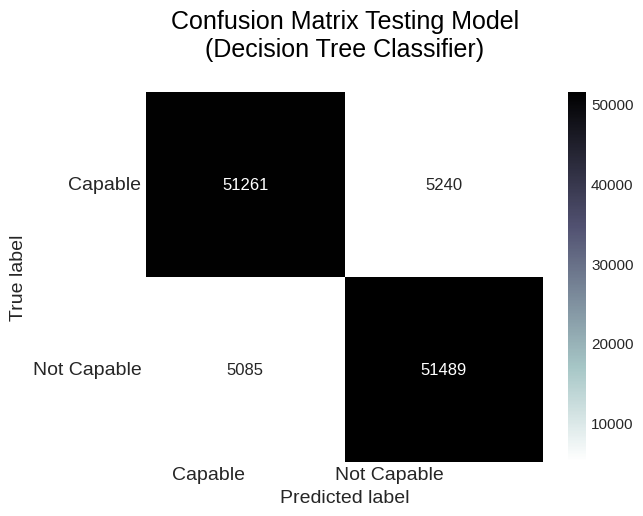

In [ ]:
#membuat confusion matrix testing model
confusion_matrix_tree = pd.DataFrame((confusion_matrix(y_test, y_test_pred_ts)), ('Capable', 'Not Capable'), ('Capable', 'Not Capable'))

#Confusion Matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_tree, annot=True, annot_kws={'size': 12}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

beradsarkan hasil dari confusion matrix training model, dapat dilihat bahwa :
- sebesar 51261 klien mampu untuk membayar pinjaman dan prediksi menunjukkan bahwa 51261 klien mampu untuk membayar pinjaman, ini adalah true positif
- sebesar 51489 klien tidak mampu untuk membayar pinjaman dan prediksi menunjukkan bahwa 51489 klien tidak mampu untuk membayar pinjaman, ini adalah true negatif
- sebesar 5085 klien tidak mampu untuk membayar pinjaman namun prediksi menunjukkan bahwa 5085 klien mampu untuk membayar pinjaman, ini adalah false positif
- sebesar 5240 klien mampu untuk membayar pinjaman namun prediksi menunjukkan bahwa 5240 klien tidak mampu untuk membayar pinjaman, ini adalah false negatif

selanjutnya kita akan melihat nilai train accuracy, test accuracy dan ROC AUC score

In [ ]:
acc_dt_train=round(tree_model.score(X_train,y_train)*100,2) #train accuracy
acc_dt_test=round(tree_model.score(X_test,y_test)*100,2) #test accuracy
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_ts),4) #ROC AUC score

print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))
print('ROC AUC:', roc_auc_dt)

Training Accuracy: % 100.0
Test Accuracy: % 90.91
ROC AUC: 0.9087


- Decision tree Model 90.87% accuracy.

- 100 - 90.87 = 9.13% Error Margin.

- ROC AUC = 0.9087

##5.5 Evaluasi Model Keseluruhan

In [ ]:
results = pd.DataFrame([["Logistic Regression", 0.6728, 0.6745, 0.67, 0.6745],
                        ["Random Forest", 1, 0.9967, 1.00, 0.9967],
                        ["Decision Tree", 1, 0.9087, 0.91, 0.9087]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score","Recall", "ROC Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False)

,Models,Training Accuracy Score,Testing Accuracy Score,Recall,ROC Score
1,Random Forest,1.0000,0.9967,1.00,0.9967
2,Decision Tree,1.0000,0.9087,0.91,0.9087
0,Logistic Regression,0.6728,0.6745,0.67,0.6745


Berdasarkan evaluasi model, kami memilih model Random Forest karena memiliki nilai akurasi test yang tinggi dibanding model lain yaitu 0.9967

###Menyimpan model terbaik menjadi CSV

In [ ]:
# Menyimpan model terbaik (Random Forest) untuk membuat dashboard
rf = classification_report(y_test, y_test_pred_rf, output_dict=True)
dashboard_rf = pd.DataFrame(rf).transpose()
dashboard_rf.to_csv(r'rf.csv')

In [ ]:
# Menyimpan ROC AUC Score (Random Forest) untuk membuat dashboard
roc = {"roc":[roc_auc_rf]}
dashboard_roc = pd.DataFrame(roc)
dashboard_roc.to_csv(r'roc.csv')